In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# import dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

In [3]:
#read in unemployment csv as dataframe
#set index to 'date' column
# set 'date' to datetime
df= pd.read_csv('resources/Unemployment Rates 1978 - 2023.csv',
               parse_dates= True,
               index_col= 'date')
df.head()

,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,advanced_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
date,,,,,,,,,,,,,,,,,,,,,
2023-07-01,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,1.7,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
2023-06-01,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,1.7,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2023-05-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,1.7,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
2023-04-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,1.7,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
2023-03-01,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,1.7,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000


In [4]:
# look at all the columns
df.columns.values

array(['all', '16-24', '25-54', '55-64', '65+', 'less_than_hs',
       'high_school', 'some_college', "bachelor's_degree",
       'advanced_degree', 'women', 'women_16-24', 'women_25-54',
       'women_55-64', 'women_65+', 'women_less_than_hs',
       'women_high_school', 'women_some_college',
       "women_bachelor's_degree", 'women_advanced_degree', 'men',
       'men_16-24', 'men_25-54', 'men_55-64', 'men_65+',
       'men_less_than_hs', 'men_high_school', 'men_some_college',
       "men_bachelor's_degree", 'men_advanced_degree', 'black',
       'black_16-24', 'black_25-54', 'black_55-64', 'black_65+',
       'black_less_than_hs', 'black_high_school', 'black_some_college',
       "black_bachelor's_degree", 'black_advanced_degree', 'black_women',
       'black_women_16-24', 'black_women_25-54', 'black_women_55-64',
       'black_women_65+', 'black_women_less_than_hs',
       'black_women_high_school', 'black_women_some_college',
       "black_women_bachelor's_degree", 'black_women_ad

In [5]:
# keep only the columns we need
unemployment_df = df[[ 'all']]
display(unemployment_df.head(30))
display(unemployment_df.tail(30))

,all
date,
2023-07-01,3.6
2023-06-01,3.6
2023-05-01,3.6
2023-04-01,3.6
2023-03-01,3.6
2023-02-01,3.6
2023-01-01,3.6
2022-12-01,3.6
2022-11-01,3.7


,all
date,
1981-05-01,7.6
1981-04-01,7.6
1981-03-01,7.6
1981-02-01,7.5
1981-01-01,7.4
1980-12-01,7.3
1980-11-01,7.2
1980-10-01,7.0
1980-09-01,6.9


In [6]:
# use .info to learn more about the dataframe
# drop nulls if any 
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 536 entries, 2023-07-01 to 1978-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   all     536 non-null    float64
dtypes: float64(1)
memory usage: 8.4 KB


In [7]:
# sort index 
unemployment_df = unemployment_df.sort_index()
unemployment_df.head(10)

,all
date,
1978-12-01,6.1
1979-01-01,6.1
1979-02-01,6.0
1979-03-01,6.0
1979-04-01,5.9
1979-05-01,5.9
1979-06-01,5.9
1979-07-01,5.8
1979-08-01,5.8


<Axes: xlabel='date'>

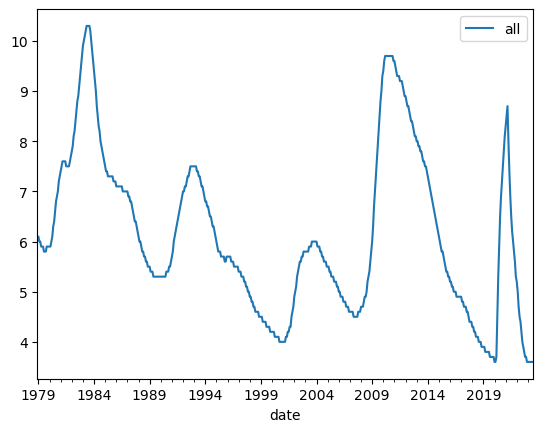

In [8]:
unemployment_df.plot()

In [11]:
# create a new column to shift the umployment rate by 1 month
unemployment_df['Unemployment Rate Shifted'] = unemployment_df['all'].shift(-1)
unemployment_df.head()

,all,Unemployment Rate Shifted
date,,
1978-12-01,6.1,6.1
1979-01-01,6.1,6.0
1979-02-01,6.0,6.0
1979-03-01,6.0,5.9
1979-04-01,5.9,5.9


In [12]:
# drop the 'all' column
unemployment_df = unemployment_df.drop(columns='all')
unemployment_df.head()

,Unemployment Rate Shifted
date,
1978-12-01,6.1
1979-01-01,6.0
1979-02-01,6.0
1979-03-01,5.9
1979-04-01,5.9


In [14]:
# Reset the index so that we recode the columns for Prophet
unemployment_df = unemployment_df.reset_index()

In [15]:
# Label the columns ds and y so that the syntax is recognized by Prophet
unemployment_df = unemployment_df.rename(columns= {'date': 'ds', 'Unemployment Rate Shifted': 'y'})

In [16]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(unemployment_df.shape)
display(unemployment_df.head())
display(unemployment_df.tail())

(536, 2)

,ds,y
0,1978-12-01,6.1
1,1979-01-01,6.0
2,1979-02-01,6.0
3,1979-03-01,5.9
4,1979-04-01,5.9


,ds,y
531,2023-03-01,3.6
532,2023-04-01,3.6
533,2023-05-01,3.6
534,2023-06-01,3.6
535,2023-07-01,NaN


In [17]:
# Sort the DataFrame by `ds` in ascending order
unemployment_df = unemployment_df.sort_values(by=["ds"], ascending=True)

# Display sample data from head and tail
display(unemployment_df.head(10))
display(unemployment_df.tail(10))

,ds,y
0,1978-12-01,6.1
1,1979-01-01,6.0
2,1979-02-01,6.0
3,1979-03-01,5.9
4,1979-04-01,5.9
5,1979-05-01,5.9
6,1979-06-01,5.8
7,1979-07-01,5.8
8,1979-08-01,5.8
9,1979-09-01,5.9


,ds,y
526,2022-10-01,3.7
527,2022-11-01,3.6
528,2022-12-01,3.6
529,2023-01-01,3.6
530,2023-02-01,3.6
531,2023-03-01,3.6
532,2023-04-01,3.6
533,2023-05-01,3.6
534,2023-06-01,3.6
535,2023-07-01,NaN


In [ ]:
#911 DATA

In [18]:
# reduce the dataset to only the period from September 1991 to October 2001
unemployment_df_911_forecast = unemployment_df.loc[(unemployment_df["ds"] >= "1992-01") & (unemployment_df["ds"] <= "2001-08")]
display(unemployment_df_911_forecast.head(10))
display(unemployment_df_911_forecast.tail(10))

,ds,y
157,1992-01-01,7.0
158,1992-02-01,7.1
159,1992-03-01,7.1
160,1992-04-01,7.2
161,1992-05-01,7.3
162,1992-06-01,7.3
163,1992-07-01,7.4
164,1992-08-01,7.5
165,1992-09-01,7.5
166,1992-10-01,7.5


,ds,y
263,2000-11-01,4.0
264,2000-12-01,4.0
265,2001-01-01,4.0
266,2001-02-01,4.0
267,2001-03-01,4.1
268,2001-04-01,4.1
269,2001-05-01,4.2
270,2001-06-01,4.2
271,2001-07-01,4.3
272,2001-08-01,4.3


<Axes: xlabel='ds'>

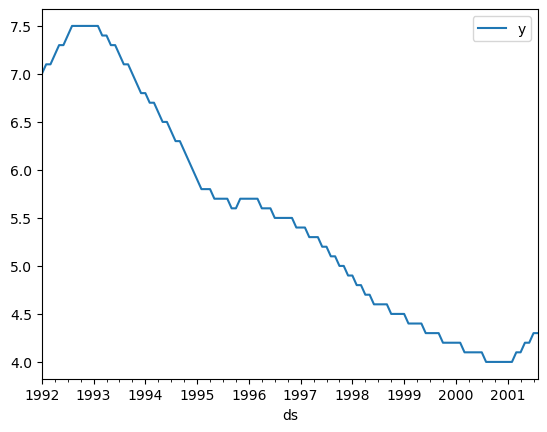

In [19]:
# plot the data
unemployment_df_911_forecast.plot(x = 'ds', y = 'y')

In [20]:
# Call the Prophet function, store as an object
model_911_unemployment = Prophet()
model_911_unemployment

In [21]:
# Fit the Prophet model.
model_911_unemployment.fit(unemployment_df_911_forecast)

20:58:32 - cmdstanpy - INFO - Chain [1] start processing
20:58:32 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 10 years
future_911_unemployment = model_911_unemployment.make_future_dataframe(periods=125, freq='M')

# View the last five rows of the predictions
future_911_unemployment.tail()

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
236,2011-08-31
237,2011-09-30
238,2011-10-31
239,2011-11-30
240,2011-12-31


In [23]:
# Make the predictions for the trend data using the future_trends DataFrame
future_911_unemployment = model_911_unemployment.predict(future_911_unemployment)

# Display the first five rows of the forecast DataFrame
future_911_unemployment.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,7.097198,7.005968,7.158715,7.097198,7.097198,-0.013935,-0.013935,-0.013935,-0.013935,-0.013935,-0.013935,0.0,0.0,0.0,7.083262
1,1992-02-01,7.141423,7.042059,7.194470,7.141423,7.141423,-0.017560,-0.017560,-0.017560,-0.017560,-0.017560,-0.017560,0.0,0.0,0.0,7.123863
2,1992-03-01,7.182796,7.099441,7.248954,7.182796,7.182796,-0.004885,-0.004885,-0.004885,-0.004885,-0.004885,-0.004885,0.0,0.0,0.0,7.177911
3,1992-04-01,7.227021,7.129220,7.291701,7.227021,7.227021,-0.014986,-0.014986,-0.014986,-0.014986,-0.014986,-0.014986,0.0,0.0,0.0,7.212035
4,1992-05-01,7.269821,7.205800,7.359869,7.269821,7.269821,0.017071,0.017071,0.017071,0.017071,0.017071,0.017071,0.0,0.0,0.0,7.286892


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


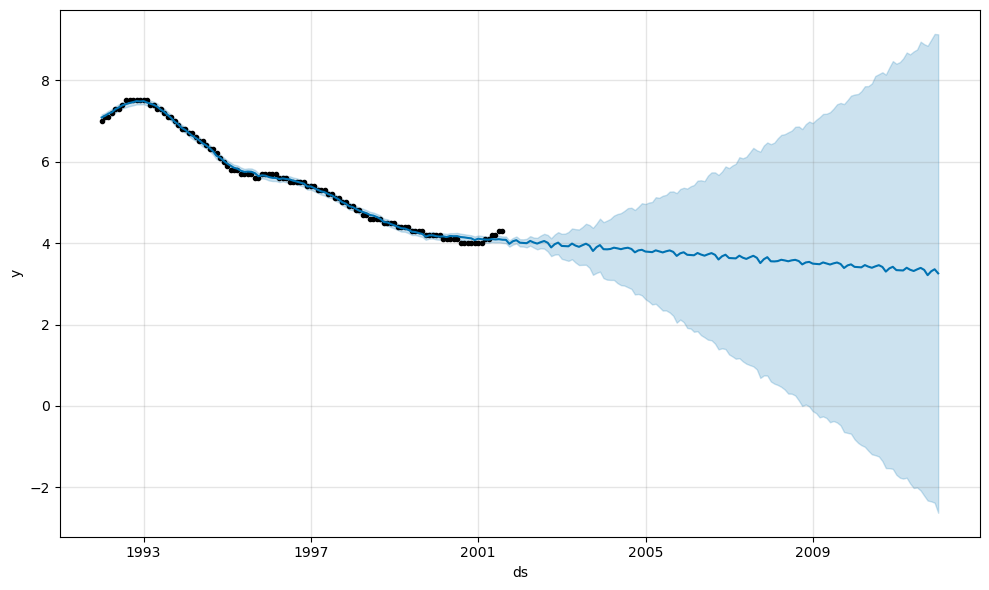

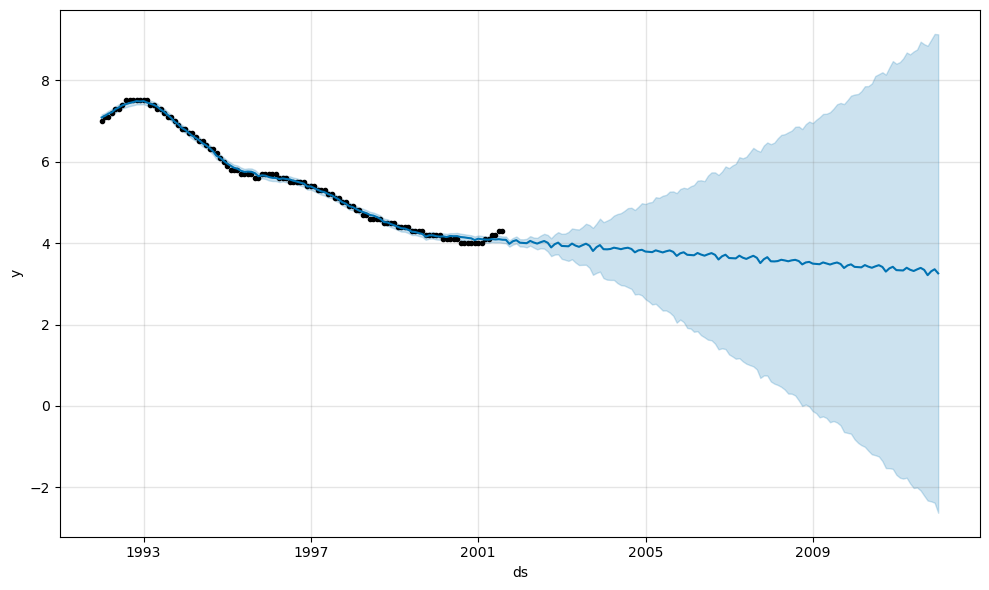

In [24]:
# Plot the Prophet predictions for the Mercado trends data
model_911_unemployment.plot(future_911_unemployment)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

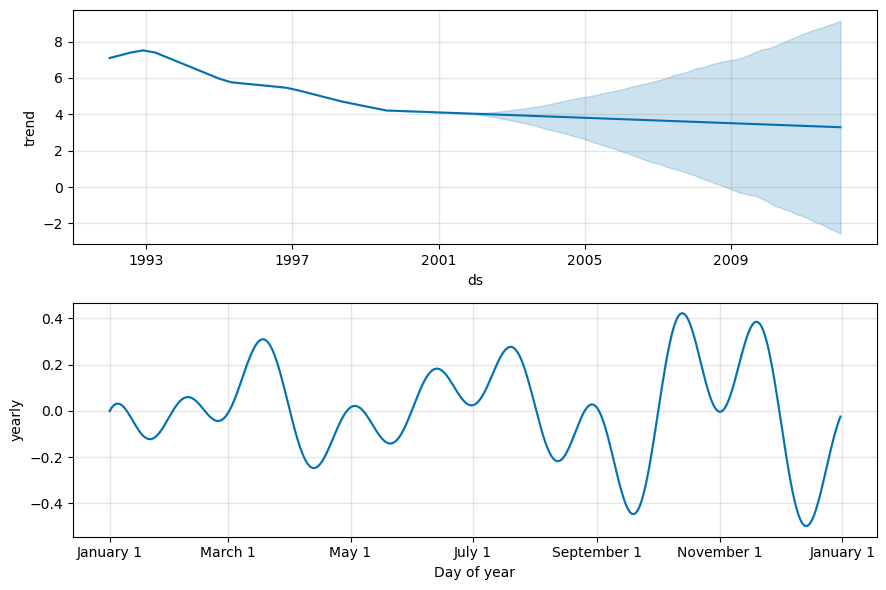

In [25]:
# Use the plot_components function to visualize the forecast results 
figures_911_unemployment = model_911_unemployment.plot_components(future_911_unemployment)

In [26]:
# At this point, it's useful to set the `datetime` index of the forecast data.
future_911_unemployment = future_911_unemployment.set_index(["ds"])
future_911_unemployment.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1992-01-01,7.097198,7.005968,7.158715,7.097198,7.097198,-0.013935,-0.013935,-0.013935,-0.013935,-0.013935,-0.013935,0.0,0.0,0.0,7.083262
1992-02-01,7.141423,7.042059,7.194470,7.141423,7.141423,-0.017560,-0.017560,-0.017560,-0.017560,-0.017560,-0.017560,0.0,0.0,0.0,7.123863
1992-03-01,7.182796,7.099441,7.248954,7.182796,7.182796,-0.004885,-0.004885,-0.004885,-0.004885,-0.004885,-0.004885,0.0,0.0,0.0,7.177911
1992-04-01,7.227021,7.129220,7.291701,7.227021,7.227021,-0.014986,-0.014986,-0.014986,-0.014986,-0.014986,-0.014986,0.0,0.0,0.0,7.212035
1992-05-01,7.269821,7.205800,7.359869,7.269821,7.269821,0.017071,0.017071,0.017071,0.017071,0.017071,0.017071,0.0,0.0,0.0,7.286892


In [27]:
# reduce the dataset to only the period from January 1992 to December 2011
unemployment_df_911_actual = unemployment_df.loc[(unemployment_df["ds"] >= "1992-01") & (unemployment_df["ds"] <= "2011-12")]
display(unemployment_df_911_actual.head(10))
display(unemployment_df_911_actual.tail(10))

,ds,y
157,1992-01-01,7.0
158,1992-02-01,7.1
159,1992-03-01,7.1
160,1992-04-01,7.2
161,1992-05-01,7.3
162,1992-06-01,7.3
163,1992-07-01,7.4
164,1992-08-01,7.5
165,1992-09-01,7.5
166,1992-10-01,7.5


,ds,y
387,2011-03-01,9.3
388,2011-04-01,9.3
389,2011-05-01,9.3
390,2011-06-01,9.2
391,2011-07-01,9.2
392,2011-08-01,9.2
393,2011-09-01,9.1
394,2011-10-01,9.0
395,2011-11-01,8.9
396,2011-12-01,8.9


<Axes: xlabel='ds'>

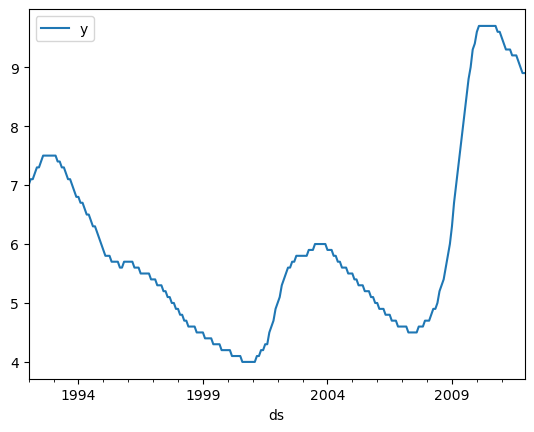

In [28]:
# Plot the data
unemployment_df_911_actual.plot(x = 'ds', y = 'y')

In [29]:
#Katrina DATA

In [30]:
# reduce the dataset to only the period from September 1995 to August 2005
unemployment_df_katrina_forecast = unemployment_df.loc[(unemployment_df["ds"] >= "1995-09") & (unemployment_df["ds"] <= "2005-08")]
display(unemployment_df_katrina_forecast.head(10))
display(unemployment_df_katrina_forecast.tail(10))

,ds,y
201,1995-09-01,5.6
202,1995-10-01,5.6
203,1995-11-01,5.7
204,1995-12-01,5.7
205,1996-01-01,5.7
206,1996-02-01,5.7
207,1996-03-01,5.7
208,1996-04-01,5.6
209,1996-05-01,5.6
210,1996-06-01,5.6


,ds,y
311,2004-11-01,5.5
312,2004-12-01,5.5
313,2005-01-01,5.5
314,2005-02-01,5.4
315,2005-03-01,5.4
316,2005-04-01,5.3
317,2005-05-01,5.3
318,2005-06-01,5.3
319,2005-07-01,5.2
320,2005-08-01,5.2


<Axes: xlabel='ds'>

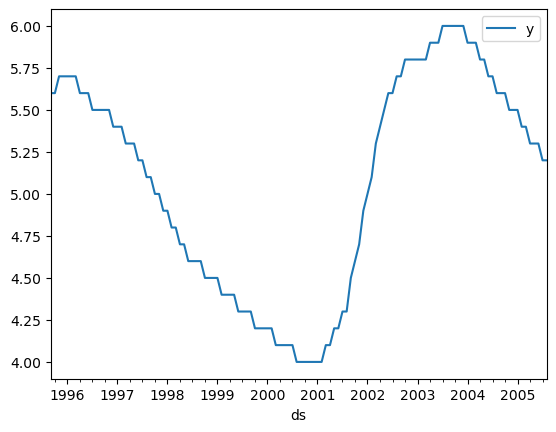

In [31]:
# plot the data
unemployment_df_katrina_forecast.plot(x = 'ds', y = 'y')

In [32]:
# Call the Prophet function, store as an object
model_katrina_unemployment = Prophet()
model_katrina_unemployment

In [33]:
# Fit the Prophet model.
model_katrina_unemployment.fit(unemployment_df_katrina_forecast)

21:06:29 - cmdstanpy - INFO - Chain [1] start processing
21:06:29 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 10 years
future_katrina_unemployment = model_katrina_unemployment.make_future_dataframe(periods=120, freq='M')
# View the last five rows of the predictions
future_katrina_unemployment.tail()

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
235,2015-03-31
236,2015-04-30
237,2015-05-31
238,2015-06-30
239,2015-07-31


In [36]:
# Make the predictions for the trend data using the future_trends DataFrame
future_katrina_unemployment = model_katrina_unemployment.predict(future_katrina_unemployment)
# Display the first five rows of the forecast DataFrame
future_katrina_unemployment.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-09-01,5.721912,5.644140,5.742895,5.721912,5.721912,-0.028793,-0.028793,-0.028793,-0.028793,-0.028793,-0.028793,0.0,0.0,0.0,5.693119
1,1995-10-01,5.706279,5.603647,5.708072,5.706279,5.706279,-0.049686,-0.049686,-0.049686,-0.049686,-0.049686,-0.049686,0.0,0.0,0.0,5.656593
2,1995-11-01,5.690126,5.636318,5.736105,5.690126,5.690126,-0.005994,-0.005994,-0.005994,-0.005994,-0.005994,-0.005994,0.0,0.0,0.0,5.684132
3,1995-12-01,5.674493,5.637340,5.740451,5.674493,5.674493,0.014260,0.014260,0.014260,0.014260,0.014260,0.014260,0.0,0.0,0.0,5.688753
4,1996-01-01,5.658340,5.614264,5.715632,5.658340,5.658340,0.006902,0.006902,0.006902,0.006902,0.006902,0.006902,0.0,0.0,0.0,5.665242


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


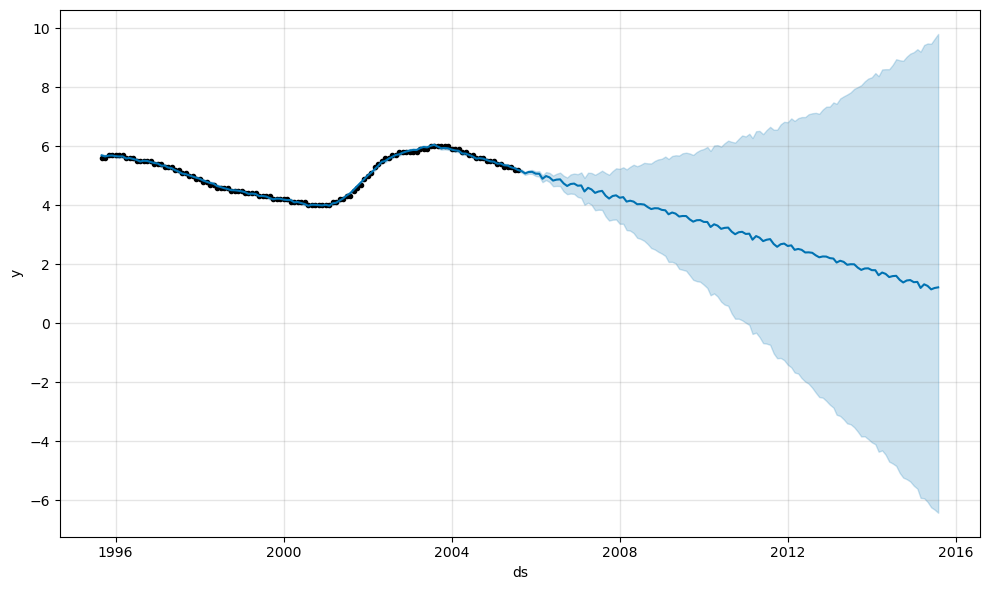

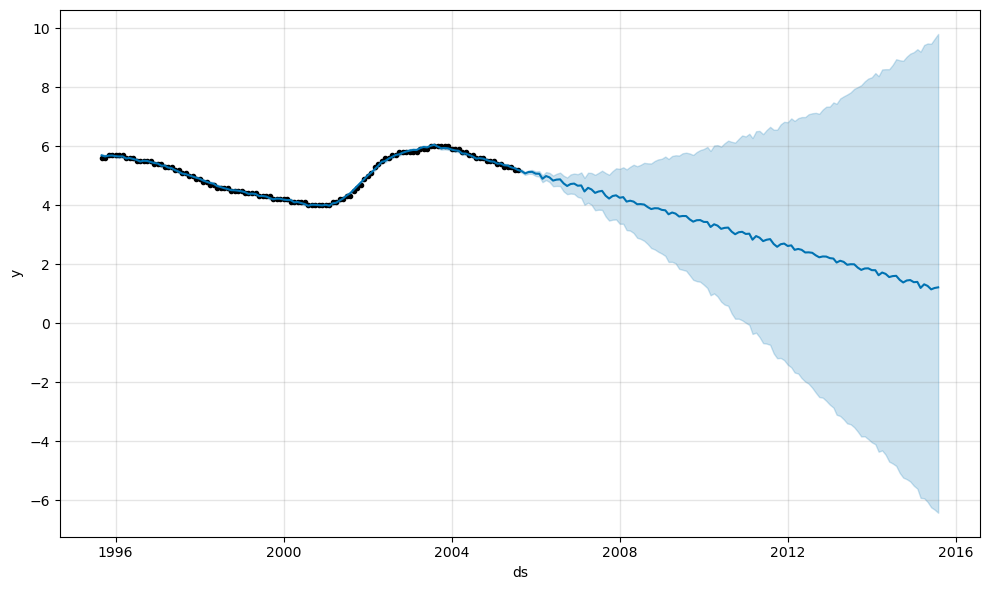

In [37]:
# Plot the Prophet predictions for the Mercado trends data
model_katrina_unemployment.plot(future_katrina_unemployment)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

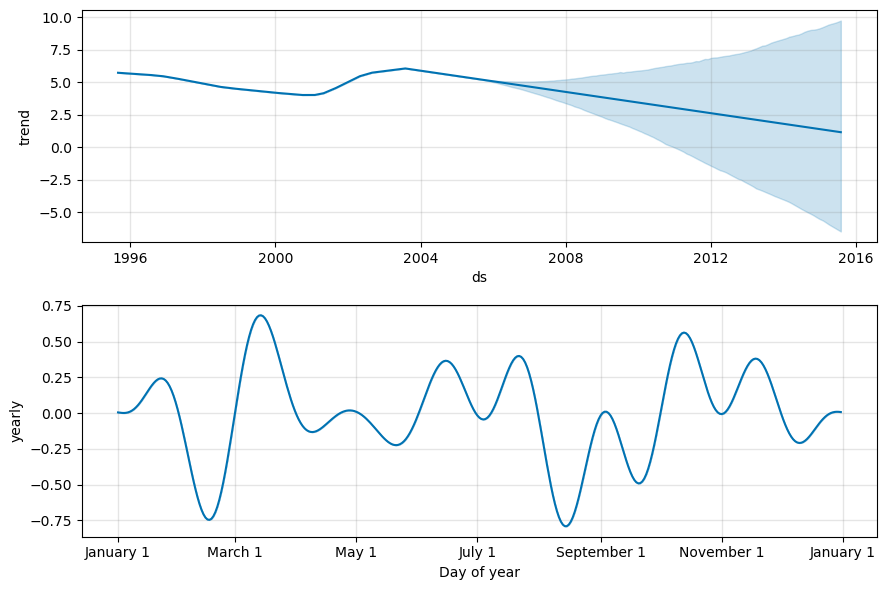

In [38]:
# Use the plot_components function to visualize the forecast results 
figures_katrina_unemployment = model_katrina_unemployment.plot_components(future_katrina_unemployment)

In [39]:
# At this point, it's useful to set the `datetime` index of the forecast data.
future_katrina_unemployment = future_katrina_unemployment.set_index(["ds"])
future_katrina_unemployment.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1995-09-01,5.721912,5.644140,5.742895,5.721912,5.721912,-0.028793,-0.028793,-0.028793,-0.028793,-0.028793,-0.028793,0.0,0.0,0.0,5.693119
1995-10-01,5.706279,5.603647,5.708072,5.706279,5.706279,-0.049686,-0.049686,-0.049686,-0.049686,-0.049686,-0.049686,0.0,0.0,0.0,5.656593
1995-11-01,5.690126,5.636318,5.736105,5.690126,5.690126,-0.005994,-0.005994,-0.005994,-0.005994,-0.005994,-0.005994,0.0,0.0,0.0,5.684132
1995-12-01,5.674493,5.637340,5.740451,5.674493,5.674493,0.014260,0.014260,0.014260,0.014260,0.014260,0.014260,0.0,0.0,0.0,5.688753
1996-01-01,5.658340,5.614264,5.715632,5.658340,5.658340,0.006902,0.006902,0.006902,0.006902,0.006902,0.006902,0.0,0.0,0.0,5.665242


In [40]:
# reduce the dataset to only the period from August 1995 to July 2015
unemployment_df_katrina_actual = unemployment_df.loc[(unemployment_df["ds"] >= "1995-08") & (unemployment_df["ds"] <= "2015-07")]
display(unemployment_df_katrina_actual.head(10))
display(unemployment_df_katrina_actual.tail(10))

,ds,y
200,1995-08-01,5.7
201,1995-09-01,5.6
202,1995-10-01,5.6
203,1995-11-01,5.7
204,1995-12-01,5.7
205,1996-01-01,5.7
206,1996-02-01,5.7
207,1996-03-01,5.7
208,1996-04-01,5.6
209,1996-05-01,5.6


,ds,y
430,2014-10-01,6.3
431,2014-11-01,6.2
432,2014-12-01,6.1
433,2015-01-01,6.0
434,2015-02-01,5.9
435,2015-03-01,5.8
436,2015-04-01,5.8
437,2015-05-01,5.7
438,2015-06-01,5.6
439,2015-07-01,5.5


<Axes: xlabel='ds'>

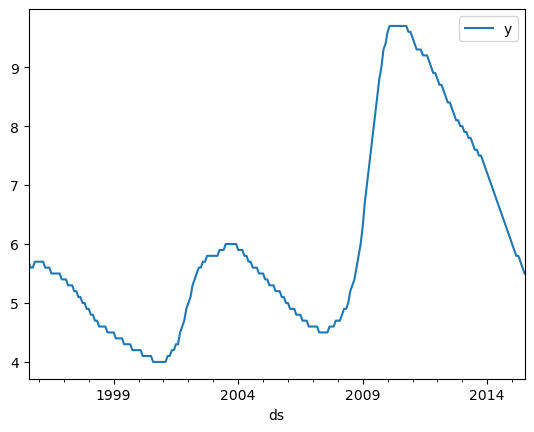

In [41]:
# Plot the data
unemployment_df_katrina_actual.plot(x = 'ds', y = 'y')